In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import pandas as pd

In [3]:
all_df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv')
key = "Country/Region"
df = all_df[all_df[key]=='Indonesia']

# discard unnecessary column & transpose data
df = df.drop("Province/State", 1).drop("Country/Region", 1).drop('Lat', 1).drop('Long', 1).T

# delta only
df.columns = ["cases"]
df["new_cases"] = df.cases - df.cases.shift()

df = df.drop("cases", 1)
df = df[df["new_cases"]>0]
df


,new_cases
3/2/20,2.0
3/6/20,2.0
3/8/20,2.0
3/9/20,13.0
3/10/20,8.0
...,...
5/3/20,349.0
5/4/20,395.0
5/5/20,484.0
5/6/20,367.0


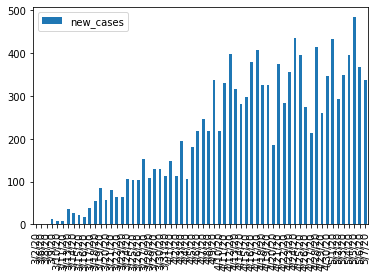

In [4]:
#plot
df.plot(kind='bar',y='new_cases')

In [5]:
# reset index
from scipy.stats import linregress

df.reset_index(level=0, inplace=True)
df.reset_index(level=0, inplace=True)
df.columns = ["index", "date", "new_cases"]
df

,index,date,new_cases
0,0,3/2/20,2.0
1,1,3/6/20,2.0
2,2,3/8/20,2.0
3,3,3/9/20,13.0
4,4,3/10/20,8.0
...,...,...,...
57,57,5/3/20,349.0
58,58,5/4/20,395.0
59,59,5/5/20,484.0
60,60,5/6/20,367.0


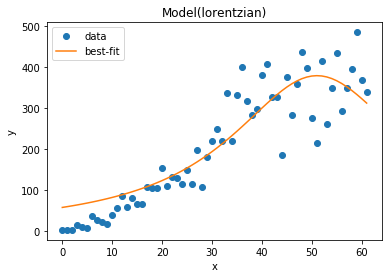

In [6]:
from lmfit.models import LorentzianModel

# curve fitting
model = LorentzianModel()
params = model.guess(df['new_cases'], x=df['index'])

result = model.fit(df['new_cases'], params, x=df['index'])

result.plot_fit()
plt.show()